### Quesion 1

In [44]:
def fibinacci_sequence(n):
    sequence = [0, 1]
    for i in range(2, n):
        sequence.append(sequence[-1] + sequence[-2])
    return sequence[:n]

print(fibinacci_sequence(12))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


### Question 2

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [75]:
dt = pd.read_csv('website_factors.csv')
dt

,Website,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,...,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,TrafficIncrease
0,SiteA,0.82,0.75,0.90,0.88,0.79,0.85,0.92,0.87,0.80,...,0.50,0.43,0.61,0.38,0.55,0.49,0.67,0.45,0.53,25
1,SiteB,0.60,0.58,0.65,0.62,0.66,0.63,0.70,0.69,0.64,...,0.33,0.44,0.52,0.40,0.48,0.51,0.54,0.46,0.50,15
2,SiteC,0.45,0.50,0.55,0.57,0.53,0.59,0.61,0.58,0.56,...,0.31,0.47,0.41,0.43,0.50,0.48,0.49,0.52,0.46,12
3,SiteD,0.90,0.88,0.92,0.95,0.89,0.93,0.96,0.94,0.91,...,0.30,0.50,0.47,0.45,0.53,0.55,0.51,0.44,0.49,35
4,SiteE,0.72,0.70,0.68,0.71,0.74,0.76,0.73,0.75,0.69,...,0.36,0.48,0.42,0.40,0.46,0.43,0.51,0.50,0.47,20
5,SiteF,0.30,0.35,0.32,0.37,0.39,0.40,0.36,0.38,0.34,...,0.39,0.35,0.44,0.42,0.46,0.43,0.47,0.48,0.45,5
6,SiteG,0.55,0.53,0.57,0.59,0.61,0.60,0.58,0.62,0.54,...,0.49,0.43,0.50,0.47,0.52,0.44,0.53,0.45,0.51,10
7,SiteH,0.95,0.96,0.94,0.93,0.92,0.97,0.95,0.96,0.91,...,0.45,0.40,0.47,0.42,0.51,0.44,0.52,0.46,0.48,38
8,SiteI,0.25,0.30,0.28,0.27,0.29,0.33,0.31,0.32,0.26,...,0.42,0.48,0.46,0.40,0.49,0.43,0.47,0.44,0.45,6
9,SiteJ,0.85,0.83,0.86,0.82,0.87,0.89,0.88,0.90,0.84,...,0.41,0.44,0.46,0.43,0.48,0.45,0.50,0.47,0.49,28


In [78]:
# Compute correlations with the "traffic increase percentage" column
correlations = dt.corr(numeric_only=True)["TrafficIncrease"].sort_values(ascending=False)
print(correlations)

TrafficIncrease    1.000000
Factor2            0.977499
Factor6            0.958055
Factor1            0.955822
Factor9            0.949958
Factor8            0.942975
Factor10           0.941687
Factor4            0.941574
Factor3            0.941289
Factor7            0.937033
Factor5            0.935137
Factor16           0.428305
Factor20           0.405773
Factor17           0.401720
Factor18           0.319586
Factor14           0.192987
Factor13           0.169427
Factor15           0.046065
Factor12          -0.000531
Factor19          -0.225909
Factor11          -0.307430
Name: TrafficIncrease, dtype: float64


In [81]:
most_correlated = dt.corr(numeric_only=True)["TrafficIncrease"].sort_values(ascending=False).iloc[0]
most_correlated

np.float64(1.0)

In [80]:
# Least correlated factor with TrafficIncrease
least_correlated = dt.corr(numeric_only=True)["TrafficIncrease"].sort_values(ascending=False).iloc[-1]
least_correlated

np.float64(-0.30743035003419406)

Top correlated factor: Factor2 (correlation = 0.977)


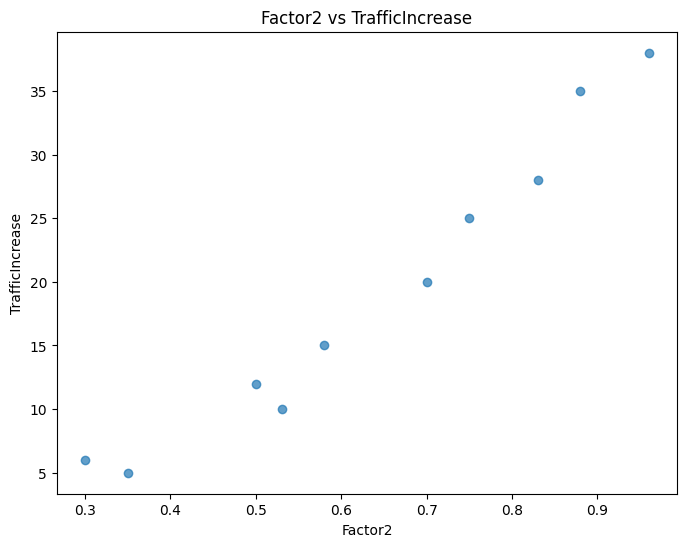

In [83]:
top_factor = correlations.index[1]

print(f"Top correlated factor: {top_factor} (correlation = {correlations.iloc[1]:.3f})")

# Create scatter plot
plt.figure(figsize=(8,6))
plt.scatter(dt[top_factor], dt["TrafficIncrease"], alpha=0.7)
plt.title(f"{top_factor} vs TrafficIncrease")
plt.xlabel(top_factor)
plt.ylabel("TrafficIncrease")
plt.show()

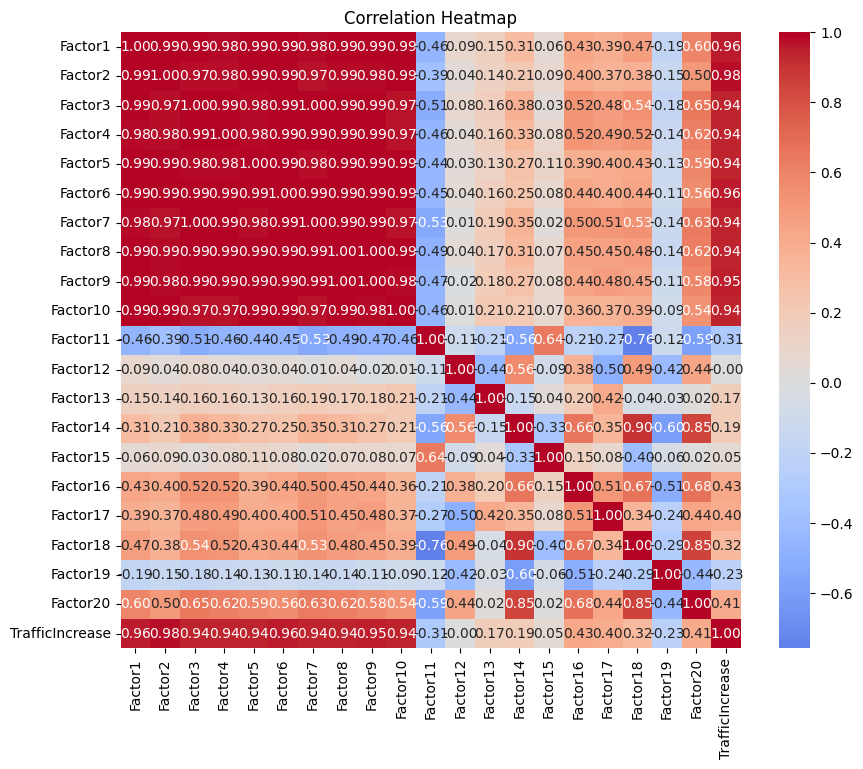

In [85]:
corr = dt.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Question 3

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [65]:
df = pd.read_csv('iris_data.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
len(df)

150

In [8]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.corr

<bound method DataFrame.corr of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

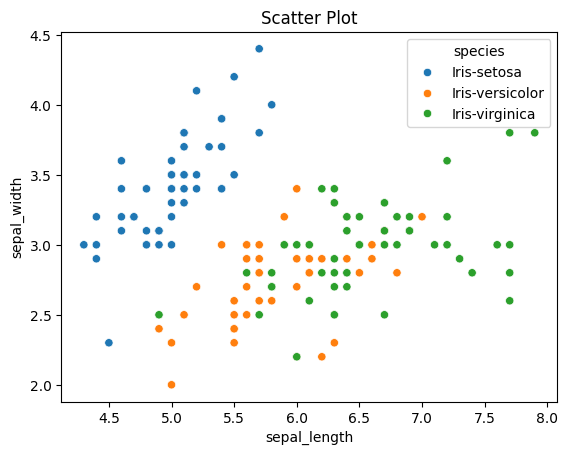

In [71]:
plt.show
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title("Scatter Plot")

plt.savefig('species_fig.jpeg')

In [13]:
df['petal_length'].mean()

np.float64(3.758666666666666)

In [14]:
df['petal_length'].median()

np.float64(4.35)

Line 4 - 6 are python libraries pandas and matplotlib
Pandas is used for data manipulation, data cleaning and data wrangling
Matplotlib is used for data visualization in python